Sample dataset:
   Accident_Severity  Speed_limit    Road_Type Weather_Conditions  Time_Hour
0                  3           60  Residential              Clear          0
1                  1           50        Urban                Fog          7
2                  3           50      Highway               Rain         13
3                  3           30      Highway               Snow         15
4                  1           50  Residential                Fog         13

Data after preprocessing:
   Accident_Severity  Speed_limit  Time_Hour  Road_Type_Residential  \
0                  3           60          0                   True   
1                  1           50          7                  False   
2                  3           50         13                  False   
3                  3           30         15                  False   
4                  1           50         13                   True   

   Road_Type_Urban  Weather_Conditions_Fog  Weather_Conditions_Rain 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


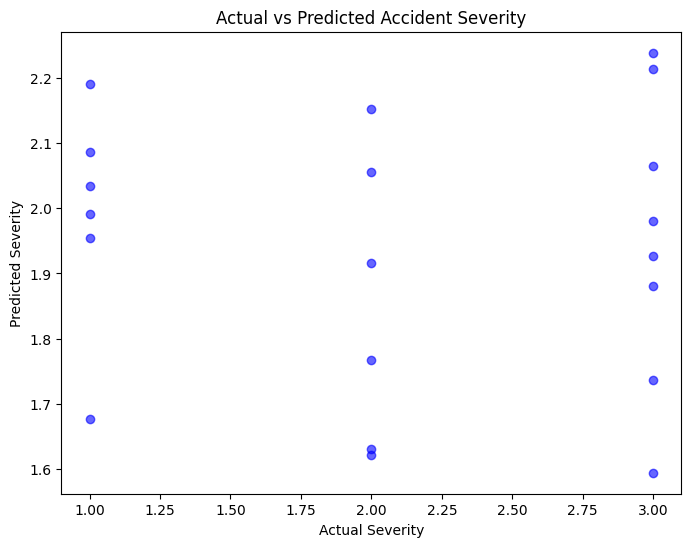

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Create a Sample Dataset
# Simulate a dataset with random data for simplicity
np.random.seed(42)  # For reproducibility

# Generate 100 rows of data
data = pd.DataFrame({
    'Accident_Severity': np.random.randint(1, 4, 100),  # Accident severity: 1 (slight), 2 (serious), 3 (fatal)
    'Speed_limit': np.random.choice([30, 40, 50, 60, 70], 100),  # Speed limits in km/h
    'Road_Type': np.random.choice(['Residential', 'Highway', 'Urban'], 100),  # Types of roads
    'Weather_Conditions': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow'], 100),  # Weather conditions
    'Time_Hour': np.random.randint(0, 24, 100)  # Hour of the accident in 24-hour format
})

# Display the first few rows of the dataset
print("Sample dataset:")
print(data.head())

# Step 3: Data Preprocessing
# Convert categorical variables (e.g., Road_Type, Weather_Conditions) into numerical format
data = pd.get_dummies(data, columns=['Road_Type', 'Weather_Conditions'], drop_first=True)

# Check the cleaned dataset
print("\nData after preprocessing:")
print(data.head())

# Step 4: Define Variables
# Separate into independent variables (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)  # Independent variables
y = data['Accident_Severity']  # Dependent variable (target)

# Step 5: Split the Data
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build and Train the Model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMean Squared Error: {mse}\nR^2 Score: {r2}")

# Step 7: Save the Model
# Save the trained model to a file
joblib.dump(model, 'accident_severity_model.joblib')
print("Model saved as 'accident_severity_model.joblib'")

# Step 8: Example Prediction
# Load the saved model
loaded_model = joblib.load('accident_severity_model.joblib')

# Hypothetical input data for prediction (Modify values to match dummies in the dataset)
# Example: Speed limit 50, residential road, clear weather, and time hour at 14 (2 PM)
sample_input = np.array([[50, 1, 0, 0, 0, 1, 14]])  # Adjust according to actual dummies in your data
sample_prediction = loaded_model.predict(sample_input)

print(f"\nPredicted Accident Severity for sample input: {sample_prediction[0]}")

# Step 9: Visualize Results (Optional)
# Plot actual vs predicted values for model performance visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.show()
